In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
import scipy.ndimage as snd
import scipy.integrate as sint

In [2]:
def fn(x,n):
    return x**n/(1+x**n)

In [3]:
def fnq(x,n,q):
    return x**n/(1+x**n + q)

In [4]:
def fnp(x,n,p):
    return (x**n+p)/(1+x**n+p)

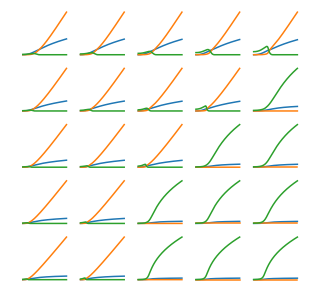

In [20]:
r0 = 1e-2*np.ones((3,))
inputs = np.linspace(0,1,300)
frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**2
frvip = lambda x: (x>0)*x**2
Wpp = 0.6
Wps = 0.3
Wsp = 2.4 # not measured in Pfeffer et al.
Wpv = 0
Wvp = 2.4 # not measured in Pfeffer et al.
Wvs = 3
Wsv = 0.7
mods = np.array((0.2,0.25,0.3,0.35,0.4))-0.1 #,0.45,0.5,0.55,0.6)
horiz = np.array((0.0,0.025,0.05,0.075,0.1))*10
rinf = np.zeros((len(horiz),len(mods),3)+inputs.shape)
plt.figure(figsize=(len(mods),len(horiz)))
for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
        def frtotal(x):
            rpc = frpc(x[0])[np.newaxis]
            rsst = frsst(x[1])[np.newaxis]
            rvip = frvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def rdot(r,inp):
            return -r + frtotal(((1+inp_horiz)*W).dot(r) + inp_horiz*inp*np.array((Wpp,Wsp,Wvp))/4 + inp*np.array((1,0,0)) + inp_vip*np.array((0,0.2,1)))
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(len(horiz),len(mods),i_horiz*len(mods)+i_mod+1)
        plt.plot(rinf[i_horiz,i_mod].T) #/rinf.max(1)[:,np.newaxis]).T)
        plt.axis('off')

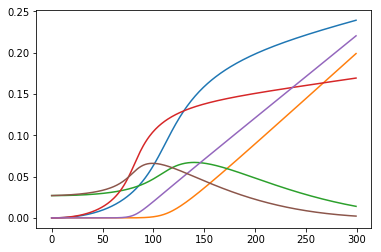

In [15]:
plt.figure()
plt.plot(rinf[0,4].T)
plt.plot(rinf[1,4].T)

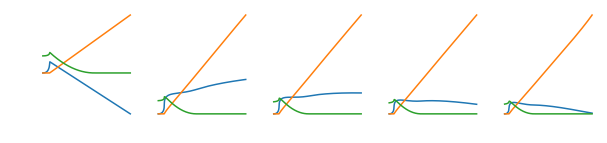

In [8]:
r0 = 1e-2*np.ones((3,))
inputs = np.linspace(0,1.5,300)
frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**2
frvip = lambda x: (x>0)*x**2
Wpp = 2.25
Wps = 2.5
Wsp = 2.5
Wpv = 0
Wvp = 0.5
Wvs = 1.5
Wsv = 1.5
mods = np.array((0.3,)) #np.array((0.2,0.25,0.3,0.35,0.4))-0.1 #,0.45,0.5,0.55,0.6)
horiz = np.array((0.0,0.025,0.05,0.075,0.1))*2.5
rinf = np.zeros((len(horiz),len(mods),3)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
        def frtotal(x):
            rpc = frpc(x[0])[np.newaxis]
            rsst = frsst(x[1])[np.newaxis]
            rvip = frvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def rdot(r,inp):
            return -r + frtotal(W.dot(r) + inp_horiz*inp*np.array((Wpp,Wsp,Wvp)) + inp*np.array((1,0,0)) + inp_vip*np.array((0,0,1)))
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot(rinf[i_horiz,i_mod].T) #/rinf.max(1)[:,np.newaxis]).T)
        plt.axis('off')

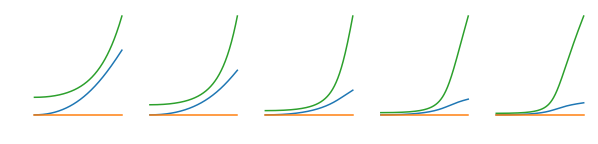

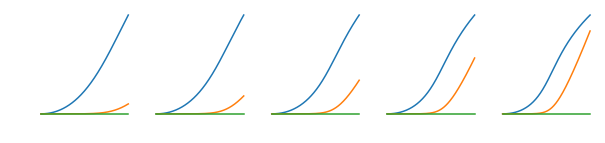

In [22]:
r0 = 1e-2*np.ones((6,))
inputs = np.linspace(0,0.4,300)
frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**3
frvip = lambda x: (x>0)*x**3
# Wpp = 1.3
# Wps = 2.1
# Wsp = 3.3
# Wpv = 0
# Wvp = 1.4
# Wvs = 2.7
# Wsv = 1.3
Wpp = 0.6
Wps = 0.3
Wsp = 1.2 # not measured in Pfeffer et al.
Wpv = 0
Wvp = 1.2 # not measured in Pfeffer et al.
Wvs = 3
Wsv = 0.7
mods = np.array((0.4,)) #np.array((0.2,0.25,0.3,0.35,0.4))-0.1 #,0.45,0.5,0.55,0.6)
horiz = np.linspace(0,1,5)
rinf = np.zeros((len(horiz),len(mods),6)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
hcoupling = 1.0
for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
        W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)
        def frtotal(x):
            rpc = frpc(x[0])[np.newaxis]
            rsst = frsst(x[1])[np.newaxis]
            rvip = frvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def frtotal_big(x):
            return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
        def rdot(r,inp):
            return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i_horiz > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz-1,i_mod][:,i])['x']
            elif i > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot(rinf[i_horiz,i_mod][:3].T) #/rinf.max(1)[:,np.newaxis]).T)
        plt.axis('off')

Wsv = 0
rinf_halo = np.zeros((len(horiz),len(mods),6)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
hcoupling = 1.0

W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

def frtotal(x):
    rpc = frpc(x[0])[np.newaxis]
    rsst = frsst(x[1])[np.newaxis]
    rvip = frvip(x[2])[np.newaxis]
    return np.concatenate((rpc,rsst,rvip),axis=0)
def frtotal_big(x):
    return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
def rdot(r,inp):
    return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i_horiz > 0:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz-1,i_mod][:,i])['x']
            elif i > 0:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot((rinf_halo[i_horiz,i_mod][:3]*(np.array((1,1,0))[:,np.newaxis])).T) #/rinf.max(1)[:,np.newaxis]).T)
        plt.axis('off')

In [31]:
rinf_halo[0,0][0,-1]

0.11310469406737489

In [20]:
sop.root(to_root,np.zeros((6,)))['x']

NameError: name 'to_root' is not defined

In [ ]:
np.linalg.det(rt['fjac'])

In [29]:
inp = 0.2
inp_vip = 0.5
inp_horiz = 1
to_root = lambda x: rdot(x,inp)

Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
Wvs = 2.1
Wsv = 1.3

nsteps = 100

roots = [None]*nsteps
# stability = [None]*nsteps

#Wvps = np.linspace(0.2,1.3,nsteps)
Wvss = np.linspace(1.5,6,nsteps)

for iWvp, Wvs in enumerate(Wvss):

    W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

    Ntries = 100
    if iWvp==0:
        solns = np.zeros((Ntries,6))
        for i in range(Ntries): 
            rt = sop.root(to_root,0.2*np.random.rand(6))
            if rt['success']:
                solns[i] = rt['x']
            else:
                solns[i] = np.nan
    else:
        nprev = roots[iWvp-1].shape[0]
        solns = np.zeros((Ntries*nprev,6))
        is_stable = np.zeros((Ntries*nprev,6),dtype=np.complex64)
        for isoln in range(nprev):
            for i in range(Ntries): 
                rt = sop.root(to_root,roots[iWvp-1][isoln] + 0.1*np.random.randn(6))
                if rt['success']:
                    solns[Ntries*isoln + i] = rt['x']
                    J = rt['fjac']
                    is_stable[Ntries*isoln + i] = np.linalg.eig(J)[0] #np.sum(np.real(np.linalg.eig(J)[0])<=0)
                else:
                    solns[Ntries*isoln + i] = np.nan
                    is_stable[Ntries*isoln + i] = np.nan

    roots[iWvp],uinds = np.unique(np.around(solns[np.logical_not(np.isnan(solns[:,0]))],decimals=3),axis=0,return_index=True)
#     stability[iWvp] = is_stable[uinds]

AttributeError: 'NoneType' object has no attribute 'shape'

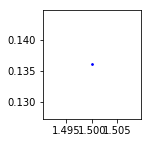

In [20]:
plt.figure(figsize=(6,2))
for i in range(3):
    plt.subplot(1,3,i+1)
    for iWvp in range(nsteps):
        plt.scatter(Wvss[iWvp]*np.ones((roots[iWvp].shape[0],)),roots[iWvp][:,i],c='b',s=3) #,c=stability[iWvp])
#plt.savefig('stability_dependent_on_Wvp.pdf')
plt.figure(figsize=(6,2))
for i in range(3):
    plt.subplot(1,3,i+1)
    for iWvp in range(nsteps):
        plt.scatter(Wvss[iWvp]*np.ones((roots[iWvp].shape[0],)),roots[iWvp][:,3+i],c='b',s=3) #,c=stability[iWvp])
#plt.savefig('stability_dependent_on_Wvp.pdf')

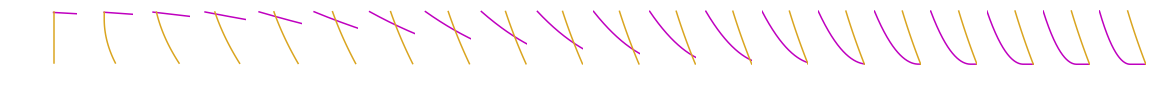

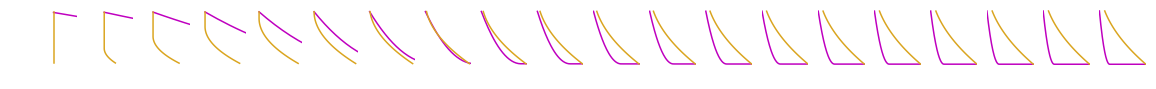

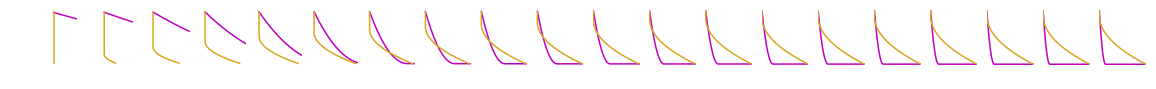

In [10]:
inp = 0.2
inp_vip = 0.5
inp_horiz = 1
to_root = lambda x: rdot(x,inp)

#     Wpp = 1
#     Wps = 1.5
#     Wsp = 3.3
#     Wpv = 0
#     Wvp = 0.7
#     Wvs = 2.1
#     Wsv = 1.3

Wpp = 1
Wps = 2
Wsp = 3
Wpv = 0
Wvp = 1
hcoupling = 1
for w in range(1,6,2):
    alpha = 0.67
    Wvs = w*alpha
    Wsv = w*(1-alpha)

    W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

    plt.figure(figsize=(20,1))

    spacer = 0.01

    for irpc,rpc in enumerate(np.linspace(0,0.5,20)):
        plt.subplot(1,20,irpc+1)
        rssts = np.linspace(0,10,1000)
        rvip_inf = np.zeros_like(rssts)
        for i_sst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0))
            h = np.array((0,0,inp_vip))
            rvip_inf[i_sst] = frtotal(W.dot(r) + h)[2]

        plt.plot(rssts,rvip_inf,c='m')

        rvips = np.linspace(0,rvip_inf.max(),100)
        rsst_inf = np.zeros_like(rvips)
        for i_vip,rvip in enumerate(rvips):
            r = np.array((rpc,0,rvip))
            h = np.array((inp,0,inp_vip))
            rsst_inf[i_vip] = frtotal(W.dot(r) + h)[1]
        plt.plot(rsst_inf,rvips,c=(218/255,165/255,32/255))

        plt.axis('off')

#         plt.xlim((rsst_inf.min()-spacer,rsst_inf.max()+spacer))
#         plt.ylim((rvip_inf.min()-spacer,rvip_inf.max()+spacer))
        plt.xlim((-spacer,rsst_inf.max()+spacer))
        plt.ylim((-spacer,rvip_inf.max()+spacer))
    plt.savefig('sst_vip_nullclines_'+str(w)+'.pdf')

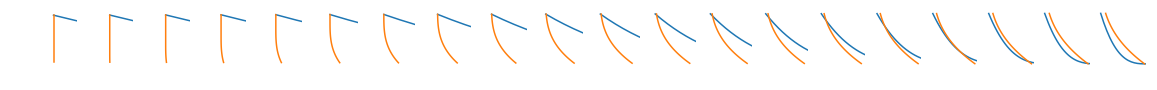

In [24]:
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
Wvs = 2.1
Wsv = 1.3
W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
def plot_sst_vip_nullclines(W):
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

    plt.figure(figsize=(20,1))

    spacer = 0.01

    for irpc,rpc in enumerate(np.linspace(0,0.2,20)):
        plt.subplot(1,20,irpc+1)
        rssts = np.linspace(0,10,1000)
        rvip_inf = np.zeros_like(rssts)
        for i_sst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0))
            h = np.array((0,0,inp_vip))
            rvip_inf[i_sst] = frtotal(W.dot(r) + h)[2]

        plt.plot(rssts,rvip_inf)

        rvips = np.linspace(0,rvip_inf.max(),100)
        rsst_inf = np.zeros_like(rvips)
        for i_vip,rvip in enumerate(rvips):
            r = np.array((rpc,0,rvip))
            h = np.array((inp,0,inp_vip))
            rsst_inf[i_vip] = frtotal(W.dot(r) + h)[1]

        plt.plot(rsst_inf,rvips)

        plt.axis('off')

#         plt.xlim((rsst_inf.min()-spacer,rsst_inf.max()+spacer))
#         plt.ylim((rvip_inf.min()-spacer,rvip_inf.max()+spacer))
        plt.xlim((-spacer,rsst_inf.max()+spacer))
        plt.ylim((-spacer,rvip_inf.max()+spacer))
#         plt.xlim((-spacer,0.4+spacer))
#         plt.ylim((-spacer,0.4+spacer))
plot_sst_vip_nullclines(W)

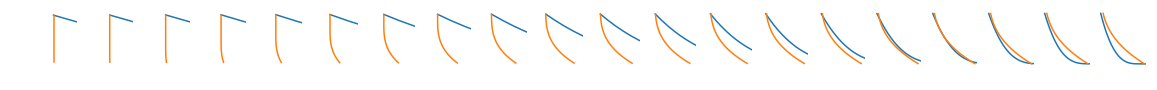

In [28]:
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1.2
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both
W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
plot_sst_vip_nullclines(W)

In [37]:
rsst_inf.max()

0.062099135999999985

In [24]:
s,v = np.linalg.eig(rt['fjac'])

In [1060]:
evol_fn = lambda 
sint.RK45()

6.981317007977318

AttributeError: 'NoneType' object has no attribute 'shape'

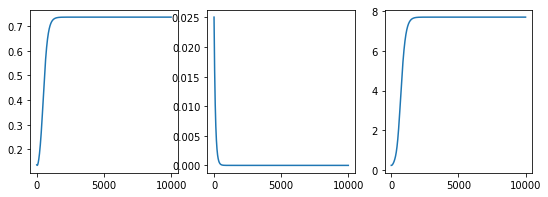

In [26]:
for val in range(10):
    plt.figure(figsize=(9,3))
    nsoln = roots[10*val].shape[0]
    for isoln in range(nsoln):
        r0 = roots[10*val][isoln]
        T = int(1e4)
        rdyn = np.zeros((T,6))
        rdyn[0] = r0 + 1e-4*np.random.randn(6)
        dt = 0.01
        for t in range(1,T):
            rdyn[t] = rdyn[t-1] + dt*to_root(rdyn[t-1])
        for idx in range(3):
            plt.subplot(1,3,idx+1)
            plt.plot(rdyn[:,idx])

In [ ]:
r0 = roots[0]

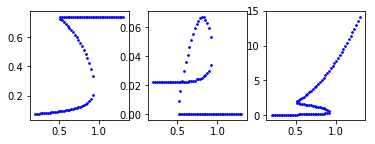

In [872]:
plt.figure(figsize=(6,2))
for i in range(3):
    plt.subplot(1,3,i+1)
    for iWvp in range(nsteps):
        plt.scatter(Wvps[iWvp]*np.ones((roots[iWvp].shape[0],)),roots[iWvp][:,i],c='b',s=3) #,c=stability[iWvp])
#plt.savefig('stability_dependent_on_Wvp.pdf')

In [841]:
stability

[array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  4.,  2.]),
 array([  4.,   4.,  nan]),
 array([ 6.,  4.,  4.]),
 array([ 4.,  4.,  4.]),
 array([ nan,   4.,   4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  4.,  4.]),
 array([ 4.,  2.,  4.]),
 array([  4.,  nan,   4.]),
 array([ 4.,  4.,  2.]),
 array([  4.,  nan,   4.]),
 array([ 4.,  4.,  4.]),
 array([  4.,  nan,   4.]),
 array([ 4.,  4.,  4.]),
 array([ nan,   4.,  nan]),
 array([  4.,  nan,  nan]),
 array([  4.,  nan,   4.]),
 array([ 4.,  4.,  4.]),
 array([ nan]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.]),
 array([ 4.])]

In [795]:
iWvp

15

In [794]:
pdb.pm()

> /home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py(217)unique()
-> ar = ar.reshape(orig_shape[0], -1)
(Pdb) ar
array([], shape=(0, 6), dtype=float64)
(Pdb) u
> <ipython-input-793-4ecf9e710351>(51)<module>()
-> roots[iWvp] = np.unique(np.around(solns[np.logical_not(np.isnan(solns[:,0]))],decimals=3),axis=0)
(Pdb) roots[iWvp
*** SyntaxError: unexpected EOF while parsing
(Pdb) roots[iWvp]
(Pdb) u
> /home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2862)run_code()
-> exec(code_obj, self.user_global_ns, self.user_ns)
(Pdb) u
*** Oldest frame
(Pdb) u
*** Oldest frame
(Pdb) exit


In [792]:
roots[0,0]

TypeError: list indices must be integers or slices, not tuple

In [786]:
np.around(solns[np.logical_not(np.isnan(solns[:,0]))],decimals=3).shape

(84, 6)

array([[ 0.205,  0.034,  0.395,  0.205,  0.034,  0.395],
       [ 0.327,  0.052,  0.687,  0.327,  0.052,  0.687]])

In [ ]:
def collect_solns(solns,cutoff=1e-5):
    

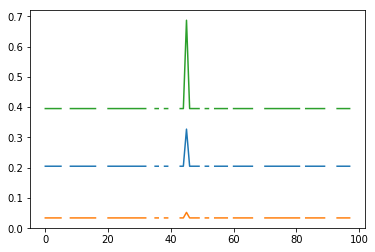

In [776]:
plt.figure()
plt.plot(solns[:,:3])

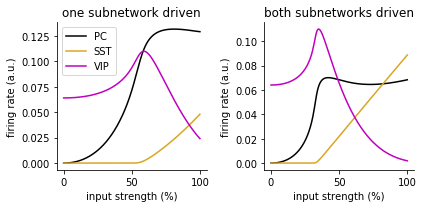

In [704]:
x = np.linspace(0,100,300)

plt.figure(figsize=(6,3))
colors = ['k',np.array((218,165,32))/255,'m']
plt.subplot(1,2,1)
for i in range(3):
    plt.plot(x,rinf[0,0][i],c=colors[i])
# plt.ylim((-0.01,rinf[:,0,i].max()))
plt.legend(['PC','SST','VIP'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('one subnetwork driven')
plt.ylabel('firing rate (a.u.)')
plt.xlabel('input strength (%)')
plt.tight_layout()
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(x,rinf[-1,0][i],c=colors[i])
# plt.ylim((-0.01,rinf[:,0,i].max()))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('both subnetworks driven')
plt.ylabel('firing rate (a.u.)')
plt.xlabel('input strength (%)')
plt.tight_layout()
plt.savefig('pc_sst_vip_same_plot.png')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


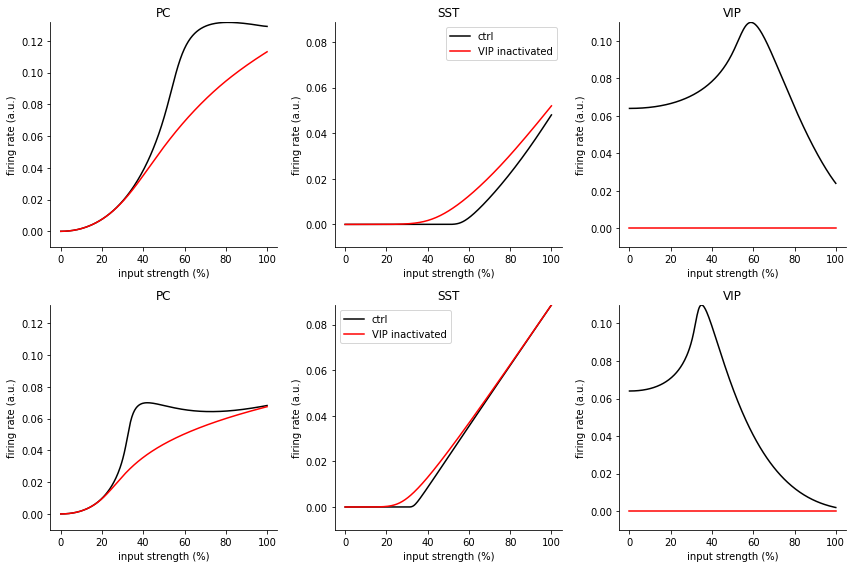

In [703]:
plt.figure(figsize=(12,8))
lbl = ['PC','SST','VIP']
x = np.linspace(0,100,300)
for i in range(3):
    plt.subplot(2,3,i+1)
    if i<2:
        plt.plot(x,rinf[0,0][i],c='k')
        plt.plot(x,rinf_halo[0,0][i],c='r')
    else:
        plt.plot(x,rinf[0,0][i],c='k')
        plt.plot(x,0*rinf_halo[0,0][i],c='r')
    plt.ylim((-0.01,rinf[:,0,i].max()))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(lbl[i])
    plt.ylabel('firing rate (a.u.)')
    plt.xlabel('input strength (%)')
    plt.tight_layout()
plt.subplot(2,3,2)
plt.legend(['ctrl','VIP inactivated'])
for i in range(3):
    plt.subplot(2,3,i+4)
    if i<2:
        plt.plot(x,rinf[-1,0][i],c='k')
        plt.plot(x,rinf_halo[-1,0][i],c='r')
    else:
        plt.plot(x,rinf[-1,0][i],c='k')
        plt.plot(x,0*rinf_halo[-1,0][i],c='r')
    plt.ylim((-0.01,rinf[:,0,i].max()))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(lbl[i])
    plt.ylabel('firing rate (a.u.)')
    plt.xlabel('input strength (%)')
    plt.tight_layout()
plt.subplot(2,3,5)
plt.legend(['ctrl','VIP inactivated'])
plt.savefig('pc_sst_vip_subnetwork_modeling_vip_halo_opto_comparison.png')
# plt.savefig('pc_sst_vip_subnetwork_modeling.png')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


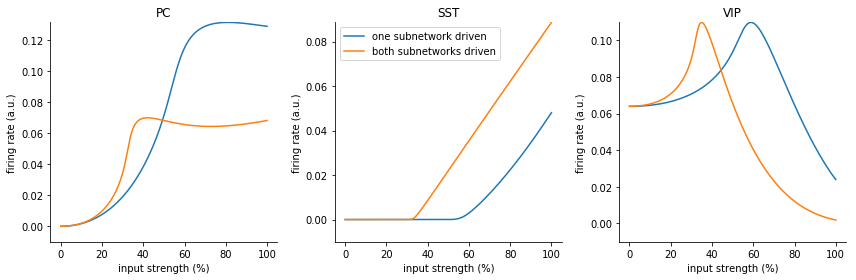

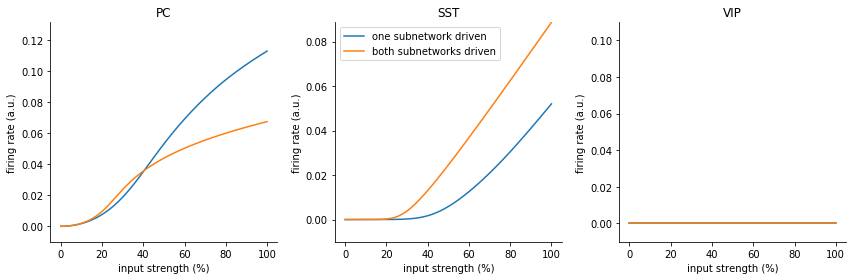

In [702]:
plt.figure(figsize=(12,4))
lbl = ['PC','SST','VIP']
x = np.linspace(0,100,300)
for i in range(3):
    plt.subplot(1,3,i+1)
    if i<2:
        plt.plot(x,rinf[0,0][i])
        plt.plot(x,rinf[-1,0][i])
    else:
        plt.plot(x,rinf[0,0][i])
        plt.plot(x,rinf[-1,0][i])
    plt.ylim((-0.01,rinf[:,0,i].max()))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(lbl[i])
    plt.ylabel('firing rate (a.u.)')
    plt.xlabel('input strength (%)')
    plt.tight_layout()
plt.subplot(1,3,2)
plt.legend(['one subnetwork driven','both subnetworks driven'])
plt.savefig('pc_sst_vip_subnetwork_modeling.png')

plt.figure(figsize=(12,4))
lbl = ['PC','SST','VIP']
x = np.linspace(0,100,300)
for i in range(3):
    plt.subplot(1,3,i+1)
    if i<2:
        plt.plot(x,rinf_halo[0,0][i])
        plt.plot(x,rinf_halo[-1,0][i])
    else:
        plt.plot(x,0*rinf_halo[0,0][i])
        plt.plot(x,0*rinf_halo[-1,0][i])
    plt.ylim((-0.01,rinf[:,0,i].max()))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(lbl[i])
    plt.ylabel('firing rate (a.u.)')
    plt.xlabel('input strength (%)')
    plt.tight_layout()
plt.subplot(1,3,2)
plt.legend(['one subnetwork driven','both subnetworks driven'])
plt.savefig('pc_sst_vip_subnetwork_modeling_vip_halo.png')

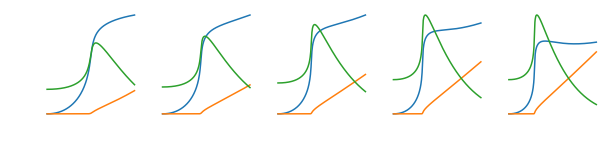

In [621]:
r0 = 1e-2*np.ones((6,))
inputs = np.linspace(0,0.3,300)
frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**3
frvip = lambda x: (x>0)*x**3
Wpp = 1.5
Wps = 2.3
Wsp = 3.4
Wpv = 0
Wvp = 1.4
Wvs = 2.7 #0 #3
Wsv = 1.3 #0 #1.2
mods = np.array((0.3,)) #np.array((0.2,0.25,0.3,0.35,0.4))-0.1 #,0.45,0.5,0.55,0.6)
horiz = np.linspace(0,1,5)
rinf = np.zeros((len(horiz),len(mods),6)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
hcoupling = 1.0
for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
        W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)
        def frtotal(x):
            rpc = frpc(x[0])[np.newaxis]
            rsst = frsst(x[1])[np.newaxis]
            rvip = frvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def frtotal_big(x):
            return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
        def rdot(r,inp):
            return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i_horiz > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz-1,i_mod][:,i])['x']
            elif i > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot(rinf[i_horiz,i_mod][:3].T) #/rinf.max(1)[:,np.newaxis]).T)
        plt.axis('off')
        
        

In [454]:
bds = np.inf*np.ones((6,))
bds[2] = 1e-4
bds[5] = 1e-4

In [392]:
bds = (-bds,bds)

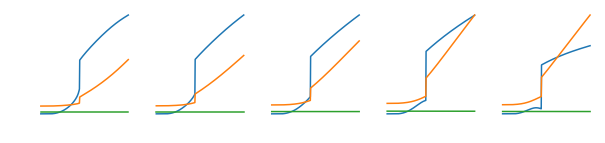

In [ ]:
plt.gca()

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


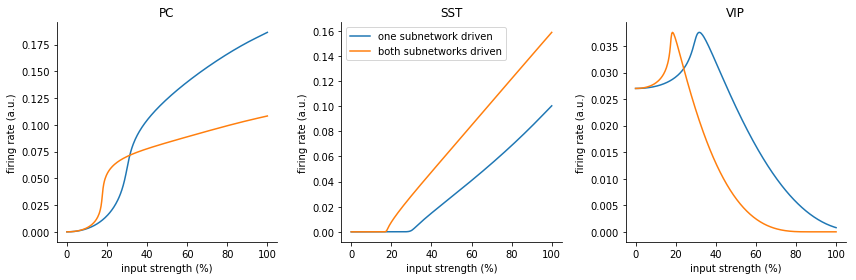

In [400]:
plt.figure(figsize=(12,4))
lbl = ['PC','SST','VIP']
x = np.linspace(0,100,300)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(x,rinf[0,0][i])
    plt.plot(x,rinf[-1,0][i])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(lbl[i])
    plt.ylabel('firing rate (a.u.)')
    plt.xlabel('input strength (%)')
    plt.tight_layout()
plt.subplot(1,3,2)
plt.legend(['one subnetwork driven','both subnetworks driven'])
plt.savefig('pc_sst_vip_subnetwork_modeling.png')

In [263]:
hcoupling = 0.3
W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

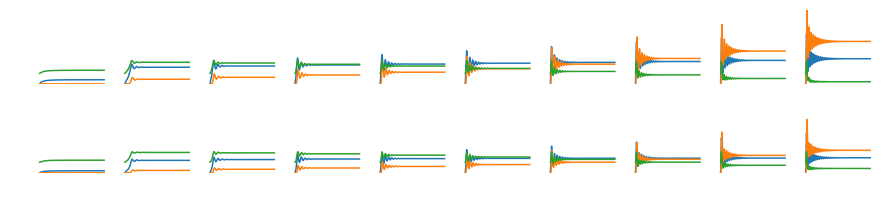

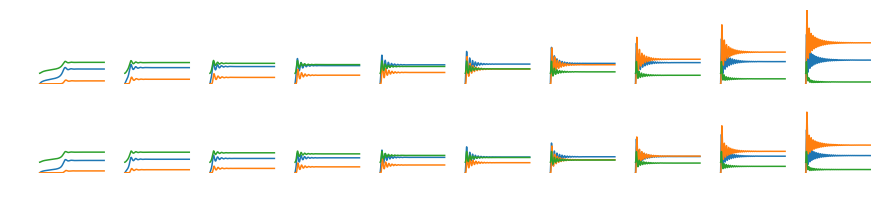

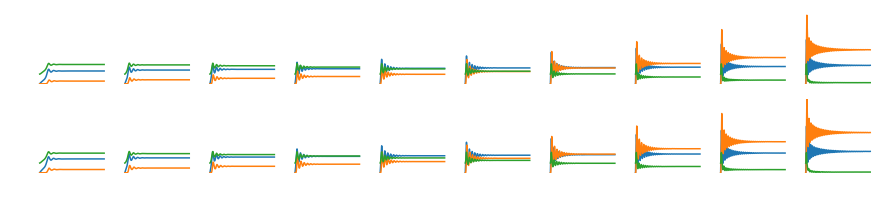

In [277]:
        inp_vip = 0.3
        T = 10000
        rt = np.zeros((6,T,Ninp,3))
        for i_horiz,inp_horiz in enumerate((0.7,0.8,1.1)):
            def frtotal(x):
                rpc = frpc(x[0])[np.newaxis]
                rsst = frsst(x[1])[np.newaxis]
                rvip = frvip(x[2])[np.newaxis]
                return np.concatenate((rpc,rsst,rvip),axis=0)
            def frtotal_big(x):
                return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
            def rdot(r,inp):
                return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
            inps = np.logspace(-1,0,10)
            Ninp = inps.size
            dt = 1e-2
            for i_inp in range(Ninp):
                for t in range(1,T):
                    rt[:,t,i_inp,i_horiz] = rt[:,t-1,i_inp,i_horiz] + dt*rdot(rt[:,t-1,i_inp,i_horiz],inps[i_inp]*(t>1000))

            plt.figure(figsize=(15,3))
            for i_inp in range(Ninp):
                plt.subplot(2,Ninp,i_inp+1)
                plt.plot(rt[:3,1000:,i_inp,i_horiz].T)
                plt.ylim(rt.min(),rt.max())
                plt.axis('off')
                plt.subplot(2,Ninp,Ninp+i_inp+1)
                plt.plot(rt[3:,1000:,i_inp,i_horiz].T)
                plt.ylim(rt.min(),rt.max())
                plt.axis('off')

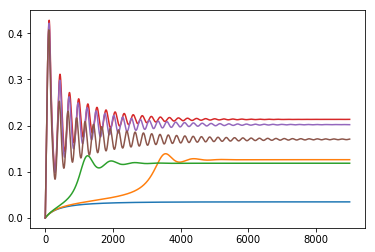

In [278]:
        inp_vip = 0.3
        T = 10000
        rt = np.zeros((6,T,Ninp,3))
        hcoupling = 0
        W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)
        for i_horiz,inp_horiz in enumerate((0.7,0.8,1.1)):
            def frtotal(x):
                rpc = frpc(x[0])[np.newaxis]
                rsst = frsst(x[1])[np.newaxis]
                rvip = frvip(x[2])[np.newaxis]
                return np.concatenate((rpc,rsst,rvip),axis=0)
            def frtotal_big(x):
                return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
            def rdot(r,inp):
                return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
            inps = np.logspace(-1,0,10)
            Ninp = inps.size
            dt = 1e-2
            for i_inp in range(Ninp):
                for t in range(1,T):
                    rt[:,t,i_inp,i_horiz] = rt[:,t-1,i_inp,i_horiz] + dt*rdot(rt[:,t-1,i_inp,i_horiz],inps[i_inp]*(t>1000))

            plt.figure(figsize=(15,3))
            for i_inp in range(Ninp):
                plt.subplot(2,Ninp,i_inp+1)
                plt.plot(rt[:3,1000:,i_inp,i_horiz].T)
                plt.ylim(rt.min(),rt.max())
                plt.axis('off')
                plt.subplot(2,Ninp,Ninp+i_inp+1)
                plt.plot(rt[3:,1000:,i_inp,i_horiz].T)
                plt.ylim(rt.min(),rt.max())
                plt.axis('off')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

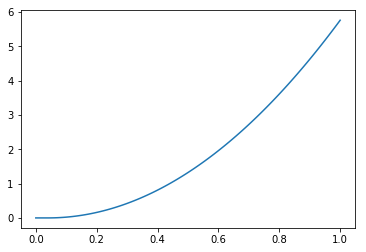

In [311]:
def rdot(rpc,rsst,rvip,inp):
    r = np.array((rpc,rsst,rvip))
    return -r + frtotal(W.dot(r) + inp*np.array((1,0,0)) + inp_vip*np.array((0,0,1)))
inp = 0.1
rvip = 0.1
rs = np.linspace(0,1,100)
rsst = np.zeros_like(rs)
plt.figure()
for ipc,rpc in enumerate(rs):
    fn_to_lsq = lambda x: rdot(rpc,x,rvip,inp)[1]
    rsst[ipc] = sop.least_squares(fn_to_lsq,0)['x']
plt.plot(rs,rsst)
rpc = np.zeros_like(rs)
for isst,rsst in enumerate(rs):
    fn_to_lsq = lambda x: rdot(x,rsst,rvip,inp)[0]
#     fn_to_lsq = lambda x: rdot(rsst,x,rvip,inp)[1]
    rpc[isst] = sop.least_squares(fn_to_lsq,0)['x']
plt.plot(rs,rpc)

In [312]:
x = 0
rdot(x,rsst,rvip,inp)[0]

0.0099009900990099028

In [307]:
fn_to_lsq = lambda x: rdot(x,rsst,rvip,inp)[0]
sop.least_squares(fn_to_lsq,0)['x']

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [308]:
import pdb
pdb.pm()

> /home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/scipy/optimize/_lsq/least_squares.py(804)least_squares()
-> if not np.all(np.isfinite(f0)):
(Pdb) f0
array([array([ 0.00990099]), 0.0099009900990099028, -0.0900990099009901], dtype=object)
(Pdb) np.all(isfinite(f0))
*** NameError: name 'isfinite' is not defined
(Pdb) np.all(np.isfinite(f0))
*** TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
(Pdb) u
> <ipython-input-307-8aedbf6c6724>(2)<module>()
-> sop.least_squares(fn_to_lsq,0)['x']
(Pdb) u
> /home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2862)run_code()
-> exec(code_obj, self.user_global_ns, self.user_ns)
(Pdb) u
*** Oldest frame
(Pdb) exit


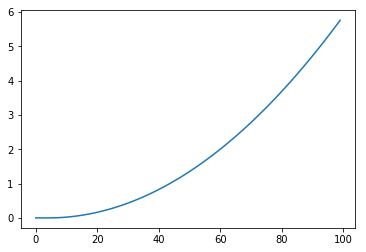

ValueError: x and y can be no greater than 2-D, but have shapes (4000,) and (4000, 10, 3)

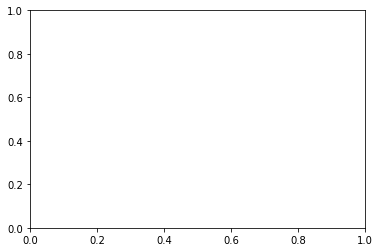

In [275]:
plt.figure()
plt.plot(rt[0,1000:])
plt.plot(rt[3,1000:])
plt.figure()
plt.plot(rt[1,1000:])
plt.plot(rt[4,1000:])

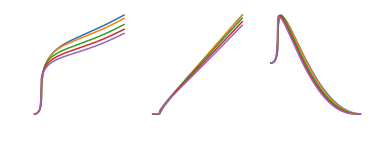

In [199]:
plt.figure(figsize=(6,2))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(rinf[:,0,i].T)
#     plt.plot(rinf[1,0,i])
    plt.axis('off')

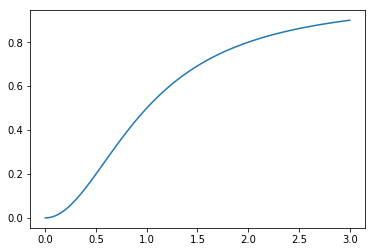

In [172]:
plt.figure()
inputs = np.linspace(0,3,100)
plt.plot(inputs,fn(inputs,2))